In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# shorten analyzer call
analyzer = SentimentIntensityAnalyzer()

# establish twitter api with tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# define targets
target_terms = ("@CNN","@BBCnews","@CBSnews","@FOXnews","@nytimes")

# define counter
counter = 1

# create varible for sentiments
sentiments = []

# loop through each target
for target in target_terms:
    
    # reset counter at beginning of each targer
    counter=1

    # get 100 tweets from the target
    public_tweets = api.user_timeline(target, count=100)

    # loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add channel and sentiments for each tweet into a list
        sentiments.append({"Channel" : target,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})

        # Add to counter 
        counter += 1

In [12]:
# move data into dataframe for easier manipulation
sentiments_df = pd.DataFrame.from_dict(sentiments).set_index("Channel")
sentiments_df.head(2)

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
Channel,,,,,,
@CNN,0.00,Wed Apr 11 05:01:08 +0000 2018,1.00,0.00,0.0,1
@CNN,-0.34,Wed Apr 11 04:46:04 +0000 2018,0.87,0.13,0.0,2


Text(0.5,0,'Tweets Ago')

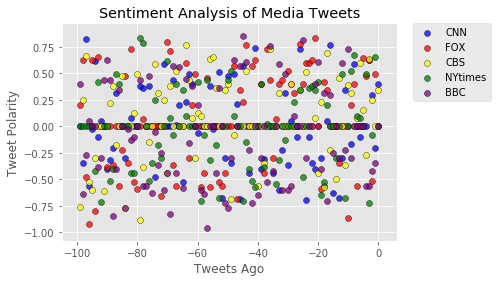

In [10]:
# create dataframe for each news channel
cnn_df = sentiments_df.filter(like='CNN', axis=0)
fox_df = sentiments_df.filter(like='FOX', axis=0)
cbs_df = sentiments_df.filter(like='CBS', axis=0)
ny_df = sentiments_df.filter(like='nytimes', axis=0)
bbc_df = sentiments_df.filter(like='BBC', axis=0)


# establish x and y axis for each news channel
cnn_x = cnn_df["Tweets Ago"]
cnn_y = cnn_df["Compound"]
fox_x = fox_df["Tweets Ago"]
fox_y = fox_df["Compound"]
cbs_x = cbs_df["Tweets Ago"]
cbs_y = cbs_df["Compound"]
ny_x = ny_df["Tweets Ago"]
ny_y = ny_df["Compound"]
bbc_x = bbc_df["Tweets Ago"]
bbc_y = bbc_df["Compound"]

# plot the data
cnn = plt.scatter(cnn_x-100, cnn_y, marker="o", alpha=0.75, facecolors="blue", edgecolors="black", label="CNN")
fox = plt.scatter(fox_x-100, fox_y, marker="o", alpha=0.75, facecolors="red", edgecolors="black", label="FOX")
cbs = plt.scatter(cbs_x-100, cbs_y, marker="o", alpha=0.75, facecolors="yellow", edgecolors="black", label="CBS")
ny = plt.scatter(ny_x-100, ny_y, marker="o", alpha=0.75, facecolors="green", edgecolors="black", label="NYtimes")
bbc = plt.scatter(bbc_x-100, bbc_y, marker="o", alpha=0.75, facecolors="purple", edgecolors="black", label="BBC")

# plot legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# assign titles
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")